# Sklearn

## sklearn.liner_model

**linear_model:**
* RidgeClassifier
* SGDClassifier
* SGDRegressor
* LinearRegression
* LogisticRegression
* Lasso
* etc

документация: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

примеры: http://scikit-learn.org/stable/modules/linear_model.html#linear-model

In [130]:
from matplotlib.colors import ListedColormap
from sklearn import cross_validation, datasets, linear_model, metrics

import numpy as np
import pandas as pd

In [131]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


D:\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### Генерация данных

In [132]:
blobs = datasets.make_blobs(n_features=3, centers=3, cluster_std=5.5, random_state=1)

In [133]:
df = pd.DataFrame(data=blobs[0], index=blobs[1])

In [134]:
df.shape

(100, 3)

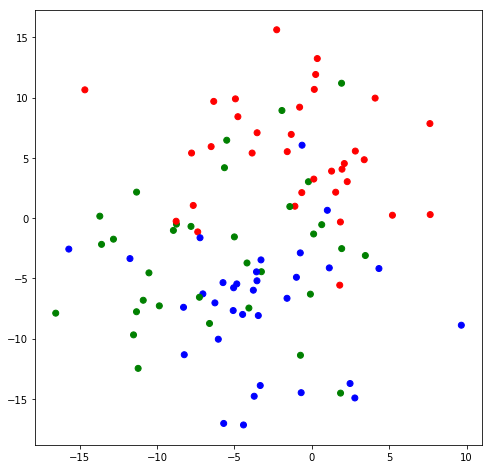

In [135]:
colors = ListedColormap(['red', 'blue', 'green'])

pylab.figure(figsize(8, 8))
pylab.scatter([x[0] for x in blobs[0]], [x[1] for x in blobs[0]], c=blobs[1], cmap=colors)

In [136]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(blobs[0], blobs[1], 
                                                                                    test_size = 0.3,
                                                                                    random_state = 1)

### Линейная классификация

#### RidgeClassifier

In [137]:
#создание объекта - классификатора
ridge_classifier = linear_model.RidgeClassifier(random_state = 1)

In [138]:
#обучение классификатора
ridge_classifier.fit(train_data, train_labels)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=1, solver='auto',
        tol=0.001)

In [139]:
#применение обученного классификатора
ridge_predictions = ridge_classifier.predict(test_data)

In [140]:
print test_labels

[0 1 2 1 1 2 1 0 1 0 0 1 2 0 0 1 1 2 2 1 0 2 0 0 0 2 2 1 1 1]


In [141]:
print ridge_predictions

[0 1 2 2 1 2 0 0 2 0 0 2 2 0 0 2 1 0 2 2 0 2 2 0 0 1 2 0 1 1]


In [142]:
#оценка качества классификации
metrics.accuracy_score(test_labels, ridge_predictions)

0.66666666666666663

In [143]:
ridge_classifier.coef_

array([[ 0.04409794,  0.0687245 , -0.02599253],
       [ 0.02301994, -0.07716598, -0.02507801],
       [-0.06711788,  0.00844148,  0.05107054]])

In [144]:
ridge_classifier.intercept_ 

array([-0.20838063, -0.61587224, -0.17574713])

#### LogisticRegression

In [145]:
log_regressor = linear_model.LogisticRegression(random_state = 1)

In [146]:
log_regressor.fit(train_data, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [147]:
lr_predictions = log_regressor.predict(test_data)

In [148]:
lr_proba_predictions = log_regressor.predict_proba(test_data)

In [149]:
print test_labels

[0 1 2 1 1 2 1 0 1 0 0 1 2 0 0 1 1 2 2 1 0 2 0 0 0 2 2 1 1 1]


In [150]:
print lr_predictions

[0 1 2 2 1 2 0 0 1 0 0 2 2 0 0 1 1 0 2 2 0 2 2 0 0 1 2 0 1 1]


In [151]:
print lr_proba_predictions

[[ 0.82918625  0.09565851  0.07515524]
 [ 0.00897226  0.80840076  0.18262698]
 [ 0.19269175  0.18305672  0.62425153]
 [ 0.09465086  0.29221143  0.61313772]
 [ 0.0793879   0.7170301   0.203582  ]
 [ 0.0439552   0.40637207  0.54967273]
 [ 0.62536381  0.2204323   0.15420389]
 [ 0.82774585  0.07127352  0.10098063]
 [ 0.06531834  0.48854081  0.44614085]
 [ 0.58811044  0.00298462  0.40890494]
 [ 0.78600521  0.01025781  0.20373698]
 [ 0.01556376  0.06651586  0.91792039]
 [ 0.13932175  0.19783783  0.66284042]
 [ 0.58161709  0.0612798   0.35710311]
 [ 0.68831144  0.01271097  0.29897759]
 [ 0.02598448  0.49237511  0.48164041]
 [ 0.00213209  0.59363457  0.40423334]
 [ 0.61183381  0.08774664  0.30041955]
 [ 0.00231596  0.18659573  0.8110883 ]
 [ 0.02229244  0.23611809  0.74158948]
 [ 0.66232757  0.02723308  0.31043934]
 [ 0.27454944  0.0227025   0.70274805]
 [ 0.29810061  0.17325755  0.52864184]
 [ 0.60602851  0.03189457  0.36207692]
 [ 0.73416533  0.00878007  0.25705461]
 [ 0.01479811  0.67813161

In [152]:
print metrics.accuracy_score(test_labels, lr_predictions)

0.733333333333


In [153]:
print metrics.accuracy_score(test_labels, ridge_predictions)

0.666666666667


### Оценка качества по cross-validation

#### cross_val_score

In [154]:
ridge_scoring = cross_validation.cross_val_score(ridge_classifier, blobs[0], blobs[1], scoring = 'accuracy', cv = 10)

In [155]:
lr_scoring = cross_validation.cross_val_score(log_regressor, blobs[0], blobs[1], scoring = 'accuracy', cv = 10)

In [156]:
lr_scoring

array([ 0.66666667,  0.75      ,  0.58333333,  0.7       ,  0.66666667,
        0.77777778,  1.        ,  0.77777778,  0.77777778,  0.77777778])

In [157]:
print 'Ridge mean:{}, max:{}, min:{}, std:{}'.format(ridge_scoring.mean(), ridge_scoring.max(), 
                                                     ridge_scoring.min(), ridge_scoring.std())

Ridge mean:0.77, max:1.0, min:0.583333333333, std:0.108673255878


In [158]:
print 'Log mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring.mean(), lr_scoring.max(), 
                                                   lr_scoring.min(), lr_scoring.std())

Log mean:0.747777777778, max:1.0, min:0.583333333333, std:0.104739535851


#### cross_val_score с заданными scorer и cv_strategy

In [159]:
scorer = metrics.make_scorer(metrics.accuracy_score)

In [160]:
cv_strategy = cross_validation.StratifiedShuffleSplit(blobs[1], n_iter = 20 , test_size = 0.3, random_state = 2)

In [161]:
ridge_scoring = cross_validation.cross_val_score(ridge_classifier, blobs[0], blobs[1], scoring = scorer, cv = cv_strategy)

In [162]:
lr_scoring = cross_validation.cross_val_score(log_regressor, blobs[0], blobs[1], scoring = scorer, cv = cv_strategy)

In [163]:
print 'Ridge mean:{}, max:{}, min:{}, std:{}'.format(ridge_scoring.mean(), ridge_scoring.max(), 
                                                     ridge_scoring.min(), ridge_scoring.std())

Ridge mean:0.743333333333, max:0.833333333333, min:0.6, std:0.0587839736285


In [164]:
print 'Log mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring.mean(), lr_scoring.max(), 
                                                   lr_scoring.min(), lr_scoring.std())

Log mean:0.728333333333, max:0.833333333333, min:0.6, std:0.0579990421377
